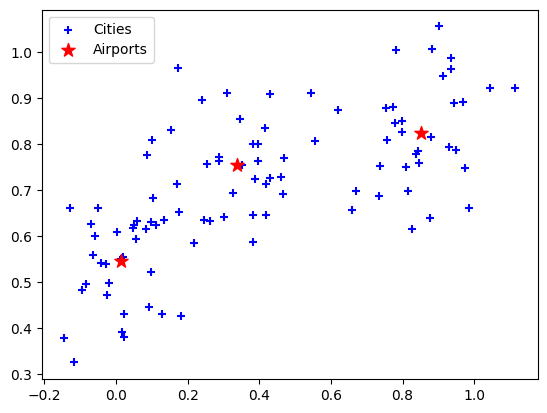

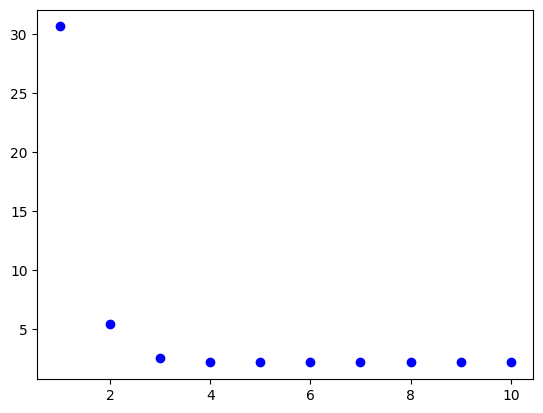

In [32]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 3
sigma = 0.1
cities = set()
airports = []

# define a learning rate
learning_rate = 0.01
# define a objective function value list
objective_value = []

'''
1. Find the cluster of cities
2. assign the airport for that cluster
3. USe the Gradient Descent to find the new location
4. Calculate the objective function value
5. Plot in the objective function value with epoch
'''


#STEP 1 & 2
#define a list of city cluster coordinates

city_cluster_x_coordinates = []
city_cluster_y_coordinates = []


#Randomly generate a cluster of cities
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

    #save this cluster to a list of coordinates
    city_cluster_x_coordinates.append(xc)
    city_cluster_y_coordinates.append(yc)

#Randomly generate airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

#separate the airports
airport1= airports[0]
airport2= airports[1]
airport3= airports[2]


#STEP 3 & 4: find the optimal location and objective function value
for i in range(10):

  # find optimal location for airport 1
  x1, y1 = airport1
  objective_value1 = sum(pow(city_cluster_x_coordinates[0]- x1,2) + pow(city_cluster_y_coordinates[0] - y1,2))
  x1_grad = -2*sum(city_cluster_x_coordinates[0] - x1)
  y1_grad = -2*sum(city_cluster_y_coordinates[0] - y1)
  x1 -= learning_rate * x1_grad
  y1 -= learning_rate * y1_grad
  airport1 = (x1, y1)

  #find optimal location for airport 2
  x2, y2 = airport2
  objective_value2 = sum(pow(city_cluster_x_coordinates[1]- x2,2) + pow(city_cluster_y_coordinates[1] - y2,2))
  x2_grad = -2*sum(city_cluster_x_coordinates[1] - x2)
  y2_grad = -2*sum(city_cluster_y_coordinates[1] - y2)
  x2 -= learning_rate * x2_grad
  y2 -= learning_rate * y2_grad
  airport2 = (x2, y2)

  #find optimal location for airport 3
  x3, y3 = airport3
  objective_value3 = sum(pow(city_cluster_x_coordinates[2]- x3,2) + pow(city_cluster_y_coordinates[2] - y3,2))
  x3_grad = -2*sum(city_cluster_x_coordinates[2] - x3)
  y3_grad = -2*sum(city_cluster_y_coordinates[2] - y3)
  x3 -= learning_rate * x3_grad
  y3 -= learning_rate * y3_grad
  airport3 = (x3, y3)

  #find objective value
  objective_value.append(objective_value1 + objective_value2 + objective_value3)

airports[0] = airport1
airports[1] = airport2
airports[2] = airport3


#STEP 5:
import matplotlib.pyplot as plt


nums = np.arange(1, 11)

fig1 = plt.figure()
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

#plot the graph as function of epoch
fig2 = plt.figure()
plt.scatter(nums, objective_value, c ="blue")
plt.show()

